In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from pandas.tseries.offsets import MonthEnd
pd.set_option('display.max_rows', None)

In [276]:
# import csv's
clean_county_pop = pd.read_csv('Clean_County_Population.csv')
total_case_count = pd.read_csv('Total_Case_Count.csv')

In [277]:
clean_county_pop.head()

,Unnamed: 0,County,Population 2020,GrowthRate
0,0,Alameda,1684000,11.2991
1,1,Alpine,1061,-8.6133
2,2,Amador,41047,8.3492
3,3,Butte,235354,7.0058
4,4,Calaveras,45522,0.1188


In [278]:
total_case_count

,County,Month,TotalCountConfirmed,TotalCountDeaths,Date
0,Alameda,March,269.0,7.0,2020-03-31
1,Alameda,April,1599.0,63.0,2020-04-30
2,Alameda,May,3362.0,104.0,2020-05-31
3,Alameda,June,6067.0,135.0,2020-06-30
4,Alameda,July,11441.0,182.0,2020-07-31
5,Alameda,August,18148.0,257.0,2020-08-31
6,Alameda,September,21271.0,412.0,2020-09-30
7,Alameda,October,22546.0,442.0,2020-10-18
8,Alpine,March,1.0,0.0,2020-03-31
9,Alpine,April,1.0,0.0,2020-04-30


In [279]:
# grabs most recent monthly total of confirmed cases per county
final_infected = []
counter = 0
for i in total_case_count['TotalCountConfirmed']:
    if counter == 7:
        final_infected.append(i)
        counter = 0
    else:
        counter = counter + 1
final_infected

[22546.0,
 3.0,
 313.0,
 3019.0,
 267.0,
 544.0,
 18120.0,
 167.0,
 1283.0,
 30051.0,
 634.0,
 540.0,
 11987.0,
 215.0,
 32799.0,
 8159.0,
 670.0,
 757.0,
 286187.0,
 4770.0,
 6969.0,
 77.0,
 988.0,
 9292.0,
 28.0,
 155.0,
 10872.0,
 1882.0,
 582.0,
 56394.0,
 3938.0,
 52.0,
 63765.0,
 24425.0,
 1395.0,
 58893.0,
 52359.0,
 11878.0,
 20932.0,
 4009.0,
 10503.0,
 9608.0,
 23169.0,
 2692.0,
 1708.0,
 6.0,
 167.0,
 6962.0,
 8781.0,
 17290.0,
 1764.0,
 774.0,
 25.0,
 17048.0,
 245.0,
 13901.0,
 3059.0,
 1176.0]

In [280]:
# calculates percent of total cases based off total population per county
percent_infected = final_infected / clean_county_pop['Population 2020']
percent_infected

0     0.013388
1     0.002828
2     0.007625
3     0.012827
4     0.005865
5     0.025266
6     0.015608
7     0.005833
8     0.006593
9     0.029750
10    0.022459
11    0.003969
12    0.065742
13    0.011901
14    0.035951
15    0.052739
16    0.010336
17    0.025099
18    0.028394
19    0.029589
20    0.026851
21    0.004390
22    0.011301
23    0.032995
24    0.003243
25    0.010854
26    0.024946
27    0.013689
28    0.005815
29    0.017634
30    0.009644
31    0.002747
32    0.025325
33    0.015582
34    0.021725
35    0.026668
36    0.015495
37    0.013322
38    0.027081
39    0.014000
40    0.013622
41    0.021429
42    0.011906
43    0.009877
44    0.009434
45    0.002039
46    0.003830
47    0.015400
48    0.017799
49    0.030935
50    0.018084
51    0.012035
52    0.002057
53    0.036165
54    0.004411
55    0.016329
56    0.013628
57    0.014595
Name: Population 2020, dtype: float64

In [281]:
# creates quartiles based off all county populations
quartiles = clean_county_pop['Population 2020'].quantile([.25,.5,.75])
quartiles

0.25     48026.25
0.50    188461.50
0.75    717992.00
Name: Population 2020, dtype: float64

In [282]:
# places counties in their respective quartiles based off their population count
bins = [0, 48027, 188462, 717993, 10079001]
population_groups = ['Quartile 1', 'Quartile 2', 'Quartile 3', 'Quartile 4']

clean_county_pop['Population Quartiles'] = pd.cut(clean_county_pop['Population 2020'], bins, labels=population_groups)
clean_county_pop = clean_county_pop.sort_values(by=['Population Quartiles'], ascending = False)
clean_county_pop

,Unnamed: 0,County,Population 2020,GrowthRate,Population Quartiles
0,0,Alameda,1684000,11.2991,Quartile 4
14,14,Kern,912316,8.4706,Quartile 4
55,55,Ventura,851297,3.1713,Quartile 4
42,42,Santa Clara,1945940,8.9503,Quartile 4
40,40,San Mateo,771019,7.1269,Quartile 4
38,38,San Joaquin,772948,12.4851,Quartile 4
37,37,San Francisco,891583,10.6800,Quartile 4
36,36,San Diego,3379160,8.8889,Quartile 4
35,35,San Bernardino,2208400,8.2066,Quartile 4
33,33,Sacramento,1567490,10.2771,Quartile 4


In [283]:
# drops Unnamed: 0 and GrowthRate series
clean_county_pop = clean_county_pop.drop(columns= ['Unnamed: 0', 'GrowthRate'])
clean_county_pop = clean_county_pop.sort_values(by='County', ascending=True)

# adds total case count series and percent total case count of population series to df
clean_county_pop['Total Cases'] = final_infected
clean_county_pop['Total Cases(%)'] = percent_infected
clean_county_pop

,County,Population 2020,Population Quartiles,Total Cases,Total Cases(%)
0,Alameda,1684000,Quartile 4,22546.0,0.013388
1,Alpine,1061,Quartile 1,3.0,0.002828
2,Amador,41047,Quartile 1,313.0,0.007625
3,Butte,235354,Quartile 3,3019.0,0.012827
4,Calaveras,45522,Quartile 1,267.0,0.005865
5,Colusa,21531,Quartile 1,544.0,0.025266
6,Contra Costa,1160920,Quartile 4,18120.0,0.015608
7,Del Norte,28628,Quartile 1,167.0,0.005833
8,El Dorado,194590,Quartile 3,1283.0,0.006593
9,Fresno,1010120,Quartile 4,30051.0,0.029750


In [284]:
# calculates average stats per quartile
quartile_avg_stats = clean_county_pop.groupby('Population Quartiles').mean()
quartile_avg_stats['Total Cases(%)'] = quartile_avg_stats['Total Cases(%)'].multiply(100)
quartile_avg_stats

,Population 2020,Total Cases,Total Cases(%)
Population Quartiles,,,
Quartile 1,2.215527e+04,227.333333,0.906915
Quartile 2,1.119531e+05,2617.142857,1.953324
Quartile 3,3.587651e+05,7487.285714,1.950644
Quartile 4,2.196668e+06,48394.800000,2.040383


In [285]:
# sets x axis and tick locations
x_axis = np.arange(len(clean_county_pop['Population Quartiles'].unique()))
tick_locations = [value for value in x_axis]
quartile_list = clean_county_pop['Population Quartiles'].unique()

Text(0, 0.5, 'Avg Total Cases(%)')

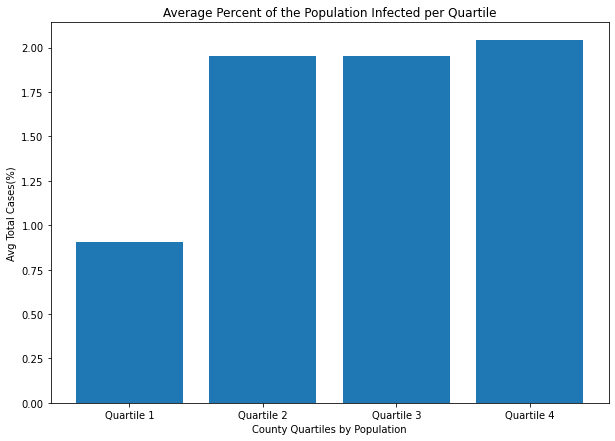

In [286]:
# plots bar chart
plt.figure(figsize=(10,7))
plt.bar(x_axis, quartile_avg_stats['Total Cases(%)'])
plt.xticks(tick_locations, sorted(quartile_list), rotation="horizontal")

plt.title('Average Percent of the Population Infected per Quartile')
plt.xlabel('County Quartiles by Population')
plt.ylabel('Avg Total Cases(%)')

In [287]:
# merges both df for a summary df by county
county_summary_df = pd.merge(clean_county_pop, total_case_count, on='County')
county_summary_df

,County,Population 2020,Population Quartiles,Total Cases,Total Cases(%),Month,TotalCountConfirmed,TotalCountDeaths,Date
0,Alameda,1684000,Quartile 4,22546.0,0.013388,March,269.0,7.0,2020-03-31
1,Alameda,1684000,Quartile 4,22546.0,0.013388,April,1599.0,63.0,2020-04-30
2,Alameda,1684000,Quartile 4,22546.0,0.013388,May,3362.0,104.0,2020-05-31
3,Alameda,1684000,Quartile 4,22546.0,0.013388,June,6067.0,135.0,2020-06-30
4,Alameda,1684000,Quartile 4,22546.0,0.013388,July,11441.0,182.0,2020-07-31
5,Alameda,1684000,Quartile 4,22546.0,0.013388,August,18148.0,257.0,2020-08-31
6,Alameda,1684000,Quartile 4,22546.0,0.013388,September,21271.0,412.0,2020-09-30
7,Alameda,1684000,Quartile 4,22546.0,0.013388,October,22546.0,442.0,2020-10-18
8,Alpine,1061,Quartile 1,3.0,0.002828,March,1.0,0.0,2020-03-31
9,Alpine,1061,Quartile 1,3.0,0.002828,April,1.0,0.0,2020-04-30


In [288]:
# drops columns
county_summary_df = county_summary_df.drop(columns = ['Total Cases', 'Total Cases(%)', 'TotalCountDeaths'])

# calculates percent of total cases to county population per month
county_summary_df['Total Cases(%)'] = county_summary_df['TotalCountConfirmed'] / county_summary_df['Population 2020']
county_summary_df.to_csv('County_Summary_Df.csv')
county_summary_df

,County,Population 2020,Population Quartiles,Month,TotalCountConfirmed,Date,Total Cases(%)
0,Alameda,1684000,Quartile 4,March,269.0,2020-03-31,0.000160
1,Alameda,1684000,Quartile 4,April,1599.0,2020-04-30,0.000950
2,Alameda,1684000,Quartile 4,May,3362.0,2020-05-31,0.001996
3,Alameda,1684000,Quartile 4,June,6067.0,2020-06-30,0.003603
4,Alameda,1684000,Quartile 4,July,11441.0,2020-07-31,0.006794
5,Alameda,1684000,Quartile 4,August,18148.0,2020-08-31,0.010777
6,Alameda,1684000,Quartile 4,September,21271.0,2020-09-30,0.012631
7,Alameda,1684000,Quartile 4,October,22546.0,2020-10-18,0.013388
8,Alpine,1061,Quartile 1,March,1.0,2020-03-31,0.000943
9,Alpine,1061,Quartile 1,April,1.0,2020-04-30,0.000943


In [289]:
# calculates average monthly percent total cases per quartile
quartile_monthly_avg = county_summary_df.groupby(['Population Quartiles', county_summary_df['Month']]).mean()
quartile_monthly_avg = quartile_monthly_avg.reindex(['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October'], level=1)
quartile_monthly_avg = quartile_monthly_avg.drop(columns= ['Population 2020', 'TotalCountConfirmed'])
quartile_monthly_avg = quartile_monthly_avg.reset_index()
quartile_monthly_avg['Total Cases(%)'] = quartile_monthly_avg['Total Cases(%)'].multiply(100)
quartile_monthly_avg

,Population Quartiles,Month,Total Cases(%)
0,Quartile 1,March,0.017032
1,Quartile 1,April,0.034424
2,Quartile 1,May,0.061232
3,Quartile 1,June,0.161845
4,Quartile 1,July,0.458457
5,Quartile 1,August,0.719219
6,Quartile 1,September,0.851716
7,Quartile 1,October,0.906915
8,Quartile 2,March,0.007234
9,Quartile 2,April,0.040143


In [290]:
# separates quartile_monthly_avg into individual dfs for each quartile
quartile1 = quartile_monthly_avg[quartile_monthly_avg['Population Quartiles'].isin(['Quartile 1'])]
quartile2 = quartile_monthly_avg[quartile_monthly_avg['Population Quartiles'].isin(['Quartile 2'])]
quartile3 = quartile_monthly_avg[quartile_monthly_avg['Population Quartiles'].isin(['Quartile 3'])]
quartile4 = quartile_monthly_avg[quartile_monthly_avg['Population Quartiles'].isin(['Quartile 4'])]
quartile4

,Population Quartiles,Month,Total Cases(%)
24,Quartile 4,March,0.020612
25,Quartile 4,April,0.108815
26,Quartile 4,May,0.220612
27,Quartile 4,June,0.471292
28,Quartile 4,July,1.117423
29,Quartile 4,August,1.660644
30,Quartile 4,September,1.914675
31,Quartile 4,October,2.040383


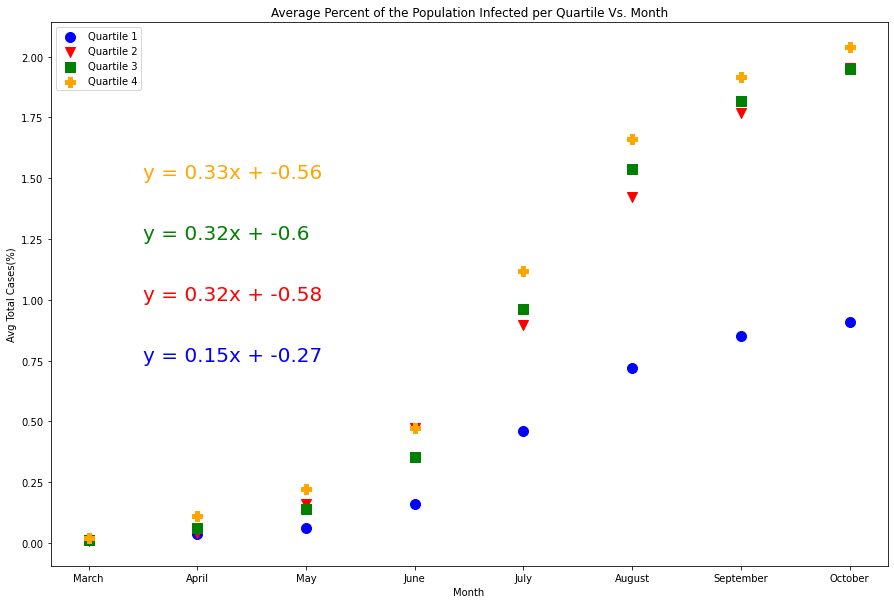

In [291]:
# plots scatter plot for each quartile
fig, axes = plt.subplots(figsize=(15,10))
plt.scatter(quartile1['Month'], quartile1['Total Cases(%)'], s=100, marker='o', c='blue')
plt.scatter(quartile2['Month'], quartile2['Total Cases(%)'], s=100, marker='v', c='red')
plt.scatter(quartile3['Month'], quartile3['Total Cases(%)'], s=100, marker='s', c='green')
plt.scatter(quartile4['Month'], quartile4['Total Cases(%)'], s=100, marker='P', c='orange')

# calculates linregress for each quartile
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress([1, 2, 3, 4, 5, 6, 7, 8], quartile1['Total Cases(%)'])
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress([1, 2, 3, 4, 5, 6, 7, 8], quartile2['Total Cases(%)'])
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress([1, 2, 3, 4, 5, 6, 7, 8], quartile3['Total Cases(%)'])
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress([1, 2, 3, 4, 5, 6, 7, 8], quartile4['Total Cases(%)'])

# calculates line equation for each quartile 
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.annotate(line_eq1,(0.5,0.75),fontsize=20,color="blue")

line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
plt.annotate(line_eq2,(0.5,1),fontsize=20,color="red")

line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))
plt.annotate(line_eq3,(0.5,1.25),fontsize=20,color="green")

line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))
plt.annotate(line_eq4,(0.5,1.5),fontsize=20,color="orange")

# sets axes labels and legend
plt.title('Average Percent of the Population Infected per Quartile Vs. Month')
plt.xlabel('Month')
plt.ylabel('Avg Total Cases(%)')
axes.legend(["Quartile 1", "Quartile 2", 'Quartile 3', 'Quartile 4'])